Simple 3d plotting with matplotlib
==================================

See also: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [1]:
%run ../talktools.py

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

Note that you must execute at least once in your session::

In [3]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the ``projection='3d'`` keyword to ``add_subplot``::

    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')

or

<IPython.core.display.Javascript object>


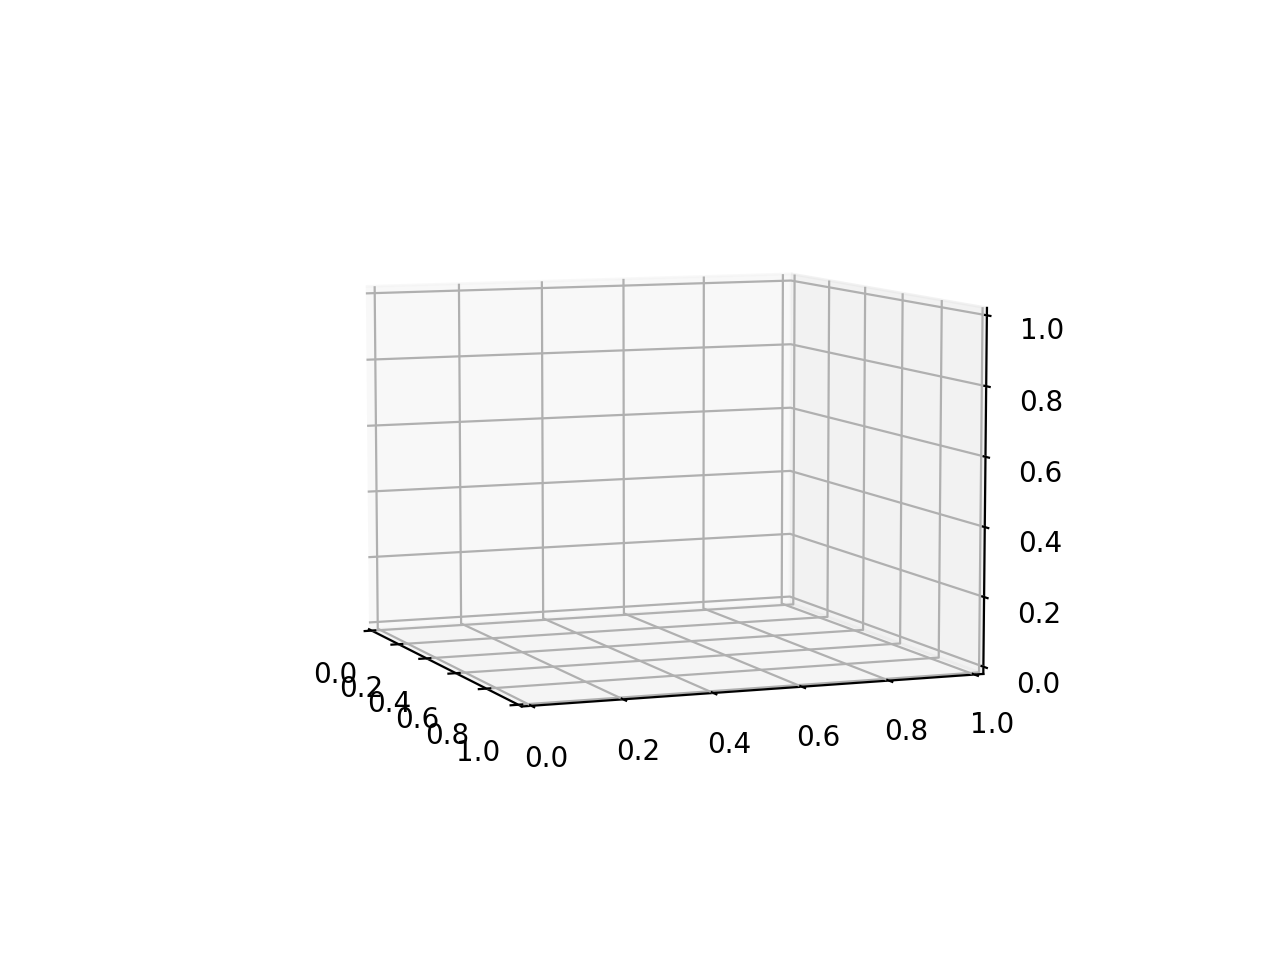

In [4]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})

A simple surface plot:

<IPython.core.display.Javascript object>


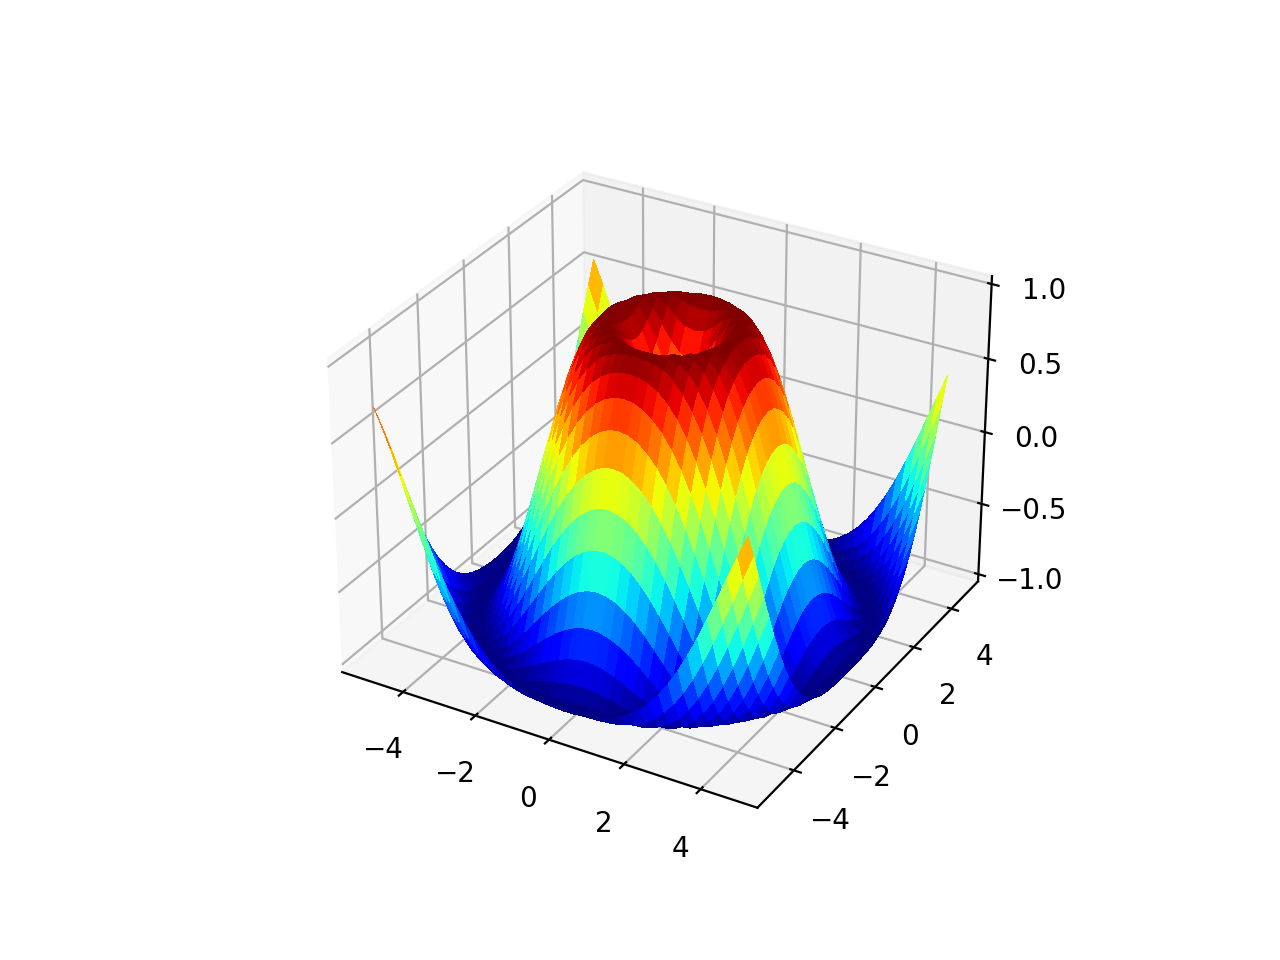

(-1.01, 1.01)

In [5]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

f, ax = plt.subplots(subplot_kw={'projection': '3d'})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

And a parametric surface specified in cylindrical coordinates:

<IPython.core.display.Javascript object>


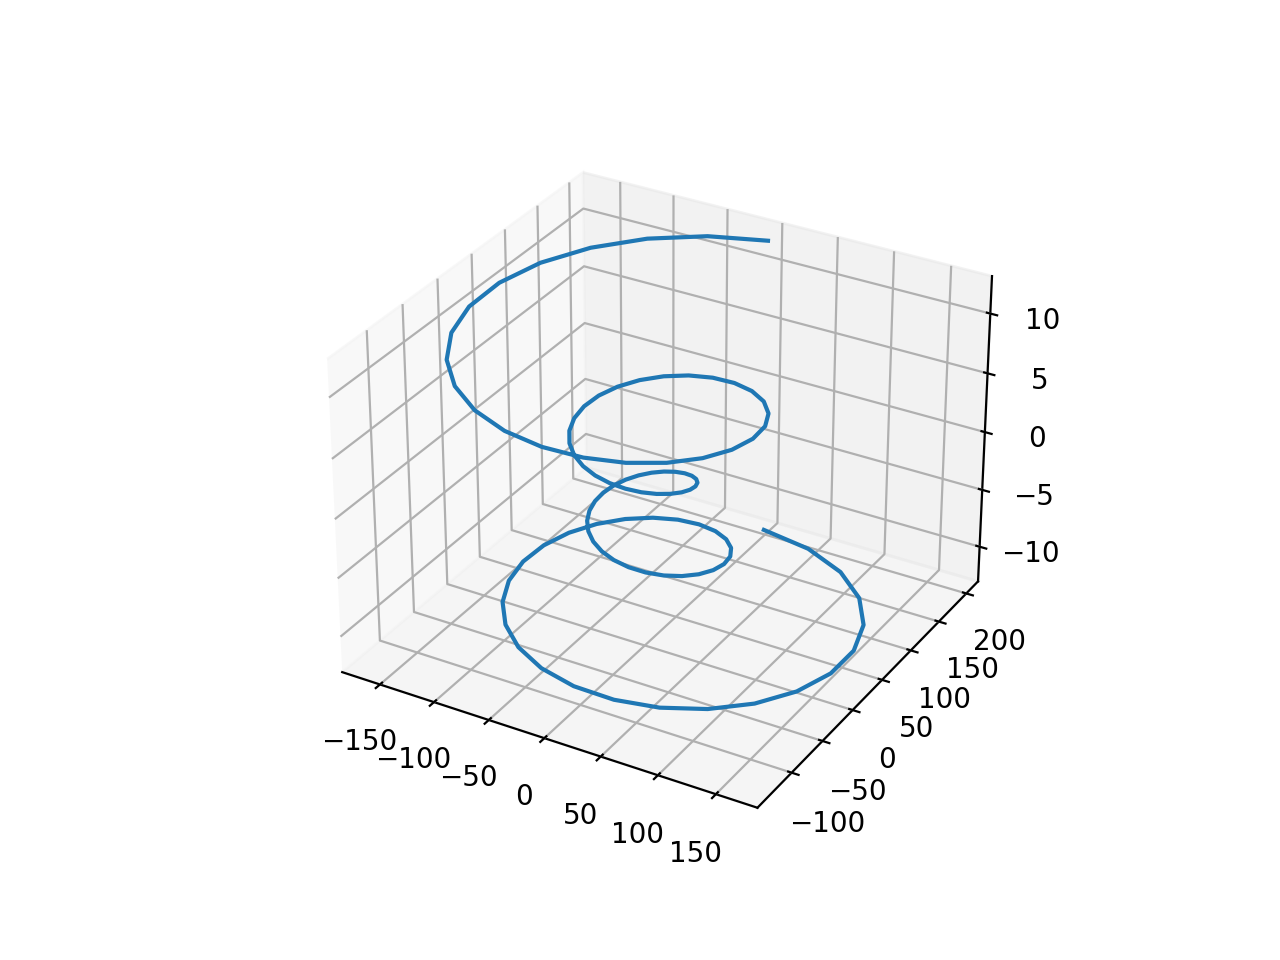

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

t = np.linspace(-4*np.pi, 4*np.pi, 100)

r = t**2 + 40
x = r * np.sin(t)
y = r * np.cos(t)
z = t

ax.plot(x, y, z)

Let's try it with some real data:

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
del data["Unnamed: 0"]

In [8]:
X, Y = np.meshgrid(np.linspace(-10, 10, data.shape[0]), np.linspace(-10, 10, data.shape[1]))

<IPython.core.display.Javascript object>


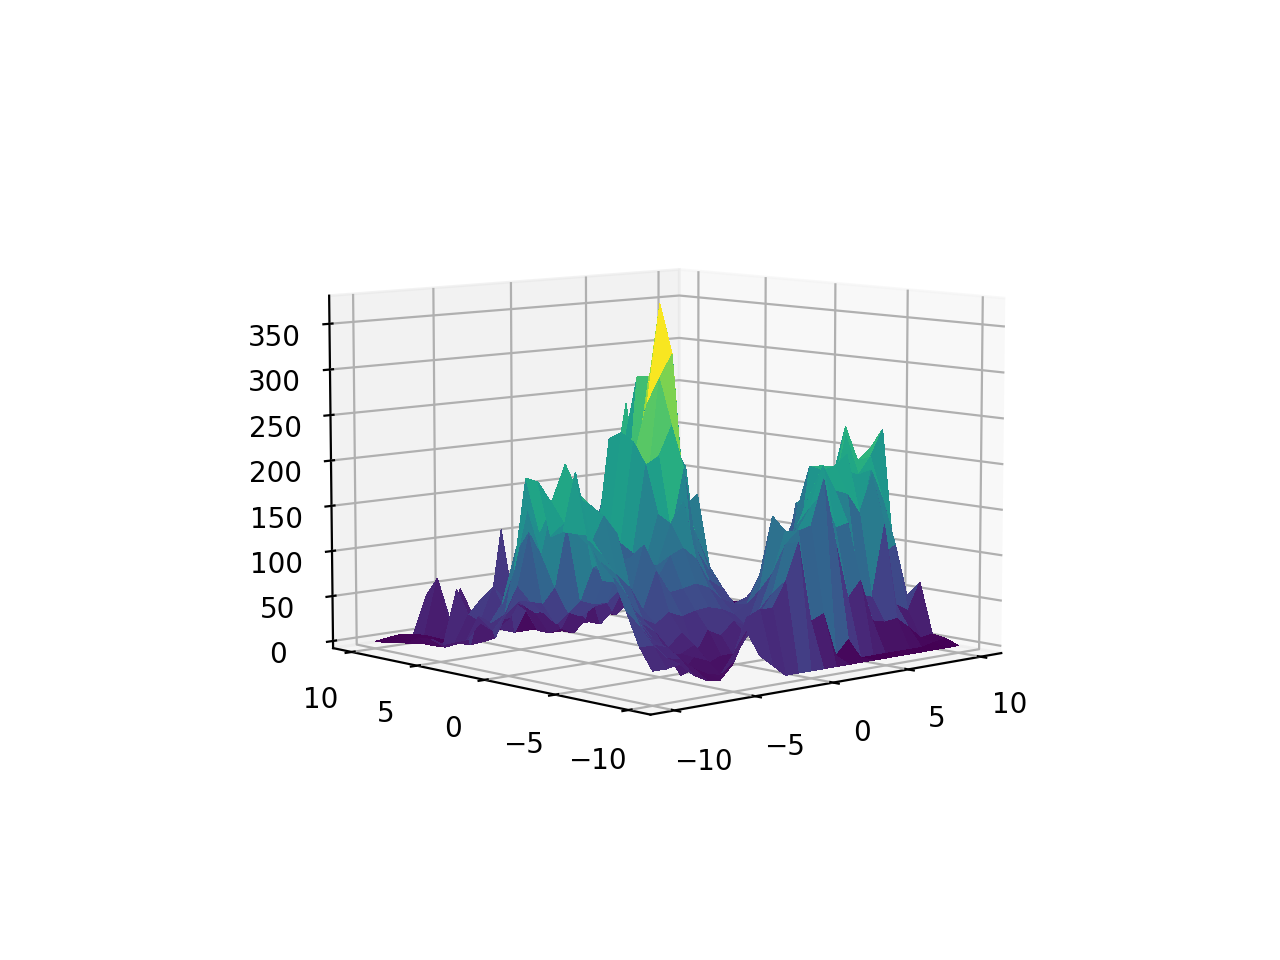

In [9]:
f, ax = plt.subplots(subplot_kw={'projection': '3d'})

surf = ax.plot_surface(X, Y, data.T.values, cmap=cm.viridis,
                       linewidth=0, antialiased=False, rstride=1, cstride=1)

## yt

"analysis toolkit operating on multidimensional datasets" ... very useful/powerful for volume rendering & 3d Viz

http://yt-project.org/doc/visualizing/volume_rendering.html

<img src="http://yt-project.org/doc/_images/vr_sample.jpg">